In [2]:
import pandas as pd
import glob
import os
from pathlib import Path
from matplotlib import pyplot as plt
import seaborn as sns

European Comission stores the data about Schengen Visa on seperate excel files for each year. After downloading them I append them together. Note: 2012 data was differently shaped than the others, so I manually edited on Excel.

In [77]:
df = pd.DataFrame()
for f in glob.glob('...Visa_Source/*.xlsx'):
    data = pd.read_excel(f, sheet_name='Data for consulates')
    data['year'] = f[-9:-5]
    df = df.append(data,ignore_index=True)

In [5]:
df.head()

,schengen_state,app_country,consulate,app,mev_issued,ltv,rejected,year,total_issued
0,Finland,RUSSIAN FEDERATION,ST. PETERSBURG,1204670.0,1171713.0,35.0,9505,2013,1195130.0
1,Spain,RUSSIAN FEDERATION,MOSCOW,1051643.0,196054.0,3991.0,10292,2013,1016986.0
2,Greece,RUSSIAN FEDERATION,MOSCOW,910824.0,332319.0,13.0,2131,2013,908680.0
3,Italy,RUSSIAN FEDERATION,MOSCOW,725524.0,707109.0,270.0,4391,2013,720863.0
4,France,RUSSIAN FEDERATION,MOSCOW,390161.0,117195.0,275.0,4726,2013,385160.0


The source files have some unnecessary tail in the document so I'll remove them:

In [78]:
df = df[all_data['Schengen State'].notna()]

In [79]:
all_data.shape

(16772, 20)

In [4]:
df = df.drop('rejection_rate', axis=1)

In [ ]:
I check the composition of the countries

In [73]:
df['schengen_state']= df['schengen_state'].str.lower()
df['app_country']= df['app_country'].str.lower()
df['consulate']= df['consulate'].str.lower()

Just making sure that there are no empty spaces:

In [76]:
df['app_country']=df['app_country'].str.strip()
df['consulate']=df['consulate'].str.strip()

In [77]:
df['schengen_state'].unique()

array(['finland', 'spain', 'greece', 'italy', 'france', 'czech republic',
       'germany', 'poland', 'lithuania', 'austria', 'latvia', 'hungary',
       'switzerland', 'netherlands', 'estonia', 'slovakia', 'sweden',
       'portugal', 'malta', 'norway', 'belgium', 'slovenia', 'denmark',
       'luxembourg', 'iceland'], dtype=object)

In [78]:
df['app_country'].unique()

array(['russian federation', 'ukraine', 'belarus', 'china', 'algeria',
       'turkey', 'tunisia', 'united kingdom', 'colombia', 'morocco',
       'india', 'saudi arabia', 'thailand', 'egypt',
       'united arab emirates', 'kuwait', 'angola', 'lebanon',
       'iran, islamic republic of', 'libyan arab jamahiriya', 'indonesia',
       'nigeria', 'peru', 'kosovo', 'qatar', 'south africa', 'senegal',
       'kazakhstan', 'philippines', "cote d'ivoire",
       'moldova, republic of', 'congo, the democratic republic of the',
       'georgia', 'dominican republic', 'suriname', 'azerbaijan',
       'armenia', 'madagascar', 'gabon', 'guinea', 'ecuador', 'mali',
       'cuba', 'cameroon', 'benin', 'mongolia', 'viet nam', 'cape verde',
       'burkina faso', 'bahrain', 'jordan', 'oman', 'uzbekistan',
       'kyrgyzstan', 'usa', 'pakistan', 'equatorial guinea', 'congo',
       'mozambique', 'haiti', 'ghana', 'iraq', 'togo', 'sri lanka',
       'niger', 'mauritania', 'chad', 'namibia', 'kenya', '

I want to standardise the name of the countries of the later use:

In [8]:
df['app_country']=df['app_country'].replace(['iran, islamic republic of','congo, the democratic republic of the', 'congo (democratic republic)', 'congo','congo (brazzaville)', 'moldova, republic of', 'libyan arab jamahiriya','taiwan, province of china', 'macao s.a.r', 'holy see (vatican city state)', 'palestinian authority', 'former yugoslav republic of macedonia',"korea, democratic people's republic of",'korea, republic of', "lao people's democratic republic", "hong kong s.a.r",  'tanzania, united republic of'], 
                          ['iran', 'congo dr', 'congo dr', 'congo-brazzaville','congo-brazzaville', 'moldova', 'libya', 'taiwan', 'macao', 'holy see', 'palestine', 'north macedonia', 'north korea', 'south korea', 'laos', "hong kong", 'tanzania'])

The "consulate" column is not necessary, so I'll drop it without losing any value:

In [5]:
df = df.groupby(['app_country','schengen_state', 'year']).sum().reset_index()

In [6]:
df['rejection_rate'] = (df['rejected']/df['app'])*100

I read a file that includes the countries that enter the Schengen zone without a visa and merged it with the main dataframe:

In [9]:
vfree = pd.read_csv(r'C:\Users\ayusu\OneDrive\Masaüstü\Data Analysis Journey\Visaoutputs\visa_free.csv')

In [10]:
vfree.head()

,app_country,visa_free
0,Albania,True
1,Andorra,True
2,Antigua and Barbuda,True
3,Argentina,True
4,Australia,True


In [11]:
vfree['app_country']=vfree['app_country'].str.strip()

In [12]:
vfree['app_country']=vfree['app_country'].str.lower()

In [13]:
df = pd.merge(df, vfree, how='left', on='app_country')

In [14]:
df['visa_free'] = df['visa_free'].fillna(False)

Let's see if it worked:

df[df['app_country']=='poland']

The na values are equal to zero in this dataframe

In [16]:
df = df.fillna(0)

In [17]:
df.describe()

,year,app,mev_issued,ltv,rejected,total_issued,rejection_rate
count,14989.000000,1.498900e+04,1.498900e+04,14989.000000,14989.000000,1.498900e+04,1.498900e+04
mean,2016.352659,8.989641e+03,4.333523e+03,63.459137,648.190473,8.218874e+03,inf
std,2.860490,4.864985e+04,3.222028e+04,807.309785,4507.092990,4.658715e+04,NaN
min,2012.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00
25%,2014.000000,4.000000e+01,1.100000e+01,0.000000,1.000000,3.200000e+01,5.628518e-01
50%,2016.000000,5.600000e+02,1.160000e+02,0.000000,31.000000,4.240000e+02,5.147915e+00
75%,2019.000000,3.014000e+03,8.170000e+02,7.000000,301.000000,2.379000e+03,1.666667e+01
max,2021.000000,1.501223e+06,1.398278e+06,35996.000000,265143.000000,1.489890e+06,inf


I want to include the continents and the subregino of these countries. So I merge it with another dataframe that includes this information and the iso codes for these countries. However, the encoding of this csv file is different, so I have to find it first:

In [29]:
import chardet
with open(r"C:\Users\ayusu\Downloads\countryContinent.csv", 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}

In [30]:
cont = pd.read_csv(r"C:\Users\ayusu\Downloads\countryContinent.csv", encoding='ISO-8859-1')
cont.head()

,country,code_2,code_3,country_code,iso_3166_2,continent,sub_region,region_code,sub_region_code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,142.0,34.0
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,150.0,154.0
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,150.0,39.0
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,2.0,15.0
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,9.0,61.0


In [31]:
cont['country'] = cont['country'].str.lower()

In [32]:
cont_short = cont[['country', 'code_2']]

In [33]:
cont2 = cont[['country', 'code_2', 'continent', 'sub_region']]

In [34]:
df = (pd.merge(df, cont_short, how='left', left_on='schengen_state', right_on='country')
 .drop(['country'], axis=1)
    .rename(columns={'code_2': 'code_schengen'}))

In [35]:
df = (pd.merge(df, cont2, how='left', left_on='app_country', right_on='country')
 .drop(['country'], axis=1)
    .rename(columns={'code_2': 'code_app'}))

In [36]:
df = df.rename(columns={'continent': 'continent_app', 'sub_region':'region_app'})
df.head()

,app_country,schengen_state,year,app,mev_issued,ltv,rejected,total_issued,rejection_rate,visa_free,code_schengen,code_app,continent_app,region_app
0,afghanistan,czech republic,2015,56.0,1.0,36.0,0,20.0,0.000000,False,CZ,AF,Asia,Southern Asia
1,afghanistan,czech republic,2016,32.0,2.0,6.0,0,25.0,0.000000,False,CZ,AF,Asia,Southern Asia
2,afghanistan,czech republic,2017,41.0,10.0,3.0,5,33.0,12.195122,False,CZ,AF,Asia,Southern Asia
3,afghanistan,czech republic,2018,108.0,26.0,41.0,1,64.0,0.925926,False,CZ,AF,Asia,Southern Asia
4,afghanistan,czech republic,2019,94.0,23.0,4.0,2,88.0,2.127660,False,CZ,AF,Asia,Southern Asia


Next step is reading and mergin aslyum request data from Eurostat. 

In [18]:
asyl = pd.read_csv(".../igr_asyappctza_linear.csv")

In [19]:
asyl.head()

,DATAFLOW,LAST UPDATE,freq,citizen,sex,unit,age,asyl_app,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
0,ESTAT:MIGR_ASYAPPCTZA(1.0),29/08/22 23:00:00,A,AD,F,PER,TOTAL,ASY_APP,AT,2008,0.0,NaN
1,ESTAT:MIGR_ASYAPPCTZA(1.0),29/08/22 23:00:00,A,AD,F,PER,TOTAL,ASY_APP,AT,2009,0.0,NaN
2,ESTAT:MIGR_ASYAPPCTZA(1.0),29/08/22 23:00:00,A,AD,F,PER,TOTAL,ASY_APP,AT,2010,0.0,NaN
3,ESTAT:MIGR_ASYAPPCTZA(1.0),29/08/22 23:00:00,A,AD,F,PER,TOTAL,ASY_APP,AT,2011,0.0,NaN
4,ESTAT:MIGR_ASYAPPCTZA(1.0),29/08/22 23:00:00,A,AD,F,PER,TOTAL,ASY_APP,AT,2012,0.0,NaN


asyl_orig = asyl.copy()

In [21]:
asyl = asyl_orig.copy()

dropping unnecessary columns

In [22]:
asyl = asyl[['citizen', 'sex', 'age', 'asyl_app', 'geo', 'TIME_PERIOD', 'OBS_VALUE']]

Checking and dropping na values:

In [23]:
for col in asyl.columns:
    pct_missing = (np.mean(asyl[col].isnull())*100)
    print('{} - {}%'.format(col, pct_missing))

citizen - 0.48229496321360754%
sex - 0.0%
age - 0.0%
asyl_app - 0.0%
geo - 0.0%
TIME_PERIOD - 0.0%
OBS_VALUE - 0.02870719177022792%


In [24]:
asyl = asyl.dropna()

checking and dropping uncessary values in the country column:

In [25]:
for col in asyl.select_dtypes(include=['object']).columns:
    unique_values = asyl[col].unique()
    print('{} - {}'.format(col, unique_values))

citizen - ['AD' 'AE' 'AF' 'AG' 'AL' 'AM' 'AO' 'AR' 'AT' 'AU' 'AZ' 'BA' 'BB' 'BD'
 'BE' 'BF' 'BG' 'BH' 'BI' 'BJ' 'BN' 'BO' 'BR' 'BS' 'BT' 'BW' 'BY' 'BZ'
 'CA' 'CD' 'CF' 'CG' 'CH' 'CI' 'CK' 'CL' 'CM' 'CN' 'CO' 'CR' 'CU' 'CV'
 'CY' 'CZ' 'DE' 'DJ' 'DK' 'DM' 'DO' 'DZ' 'EC' 'EE' 'EG' 'EH' 'EL' 'ER'
 'ES' 'ET' 'EU27_2020' 'EU28' 'EXT_EU27_2020' 'EXT_EU28' 'FI' 'FJ' 'FM'
 'FR' 'GA' 'GD' 'GE' 'GH' 'GM' 'GN' 'GQ' 'GT' 'GW' 'GY' 'HN' 'HR' 'HT'
 'HU' 'ID' 'IE' 'IL' 'IN' 'IQ' 'IR' 'IS' 'IT' 'JM' 'JO' 'JP' 'KE' 'KG'
 'KH' 'KI' 'KM' 'KN' 'KP' 'KR' 'KW' 'KZ' 'LA' 'LB' 'LC' 'LI' 'LK' 'LR'
 'LS' 'LT' 'LU' 'LV' 'LY' 'MA' 'MC' 'MD' 'ME' 'MG' 'MH' 'MK' 'ML' 'MM'
 'MN' 'MR' 'MT' 'MU' 'MV' 'MW' 'MX' 'MY' 'MZ' 'NE' 'NG' 'NI' 'NL' 'NO'
 'NP' 'NR' 'NZ' 'OM' 'PA' 'PE' 'PG' 'PH' 'PK' 'PL' 'PS' 'PT' 'PW' 'PY'
 'QA' 'RNC' 'RO' 'RS' 'RU' 'RW' 'SA' 'SB' 'SC' 'SD' 'SE' 'SG' 'SI' 'SK'
 'SL' 'SM' 'SN' 'SO' 'SR' 'SS' 'ST' 'STLS' 'SV' 'SY' 'SZ' 'TD' 'TG' 'TH'
 'TJ' 'TL' 'TM' 'TN' 'TO' 'TOTAL' 'TR' 'TT' 'TV' 'TW' 'TZ' 'UA'

In [26]:
asyl = asyl[asyl['sex']=='T']
asyl = asyl[asyl['age']=='TOTAL']
asyl = asyl[asyl['asyl_app']=='NASY_APP']
asyl = asyl.drop(asyl[asyl.geo=='EU27_2020'].index)

In [27]:
asyl = asyl[~asyl['citizen'].str.contains('EU')]

In [28]:
asyl = asyl[['citizen', 'geo', 'TIME_PERIOD', 'OBS_VALUE']]

In [37]:
asyl = asyl.rename(columns={'citizen':'code_app', 'geo':'code_schengen', 'TIME_PERIOD':'year', 'OBS_VALUE':'asyl_app'})
asyl.head()

,code_app,code_schengen,year,asyl_app
14223,AD,AT,2014,0.0
14224,AD,AT,2015,0.0
14225,AD,AT,2016,0.0
14226,AD,AT,2017,0.0
14227,AD,AT,2018,0.0


In [38]:
df = pd.merge(df, asyl, on=['code_app', 'code_schengen', 'year'], how='left')

Let's look at the dataframe once more:

In [52]:
df.head()

,app_country,schengen_state,year,app,mev_issued,ltv,rejected,total_issued,rejection_rate,visa_free,code_schengen,code_app,continent_app,region_app,asyl_app
0,Afghanistan,Czech Republic,2015,56.0,1.0,36.0,0,20.0,0.000000,False,CZ,AF,Asia,Southern Asia,25.0
1,Afghanistan,Czech Republic,2016,32.0,2.0,6.0,0,25.0,0.000000,False,CZ,AF,Asia,Southern Asia,35.0
2,Afghanistan,Czech Republic,2017,41.0,10.0,3.0,5,33.0,12.195122,False,CZ,AF,Asia,Southern Asia,15.0
3,Afghanistan,Czech Republic,2018,108.0,26.0,41.0,1,64.0,0.925926,False,CZ,AF,Asia,Southern Asia,20.0
4,Afghanistan,Czech Republic,2019,94.0,23.0,4.0,2,88.0,2.127660,False,CZ,AF,Asia,Southern Asia,20.0


Conducting some preliminarny correlation tests:

In [43]:
df = df[df['rejection_rate']<=100]
df = df[df['visa_free']==False]
df = df[df['asyl_app']<20000]

In [53]:
df.describe()

,year,app,mev_issued,ltv,rejected,total_issued,rejection_rate,asyl_app
count,14989.000000,1.498900e+04,1.498900e+04,14989.000000,14989.000000,1.498900e+04,1.498900e+04,11706.000000
mean,2016.352659,8.989641e+03,4.333523e+03,63.459137,648.190473,8.218874e+03,inf,249.835554
std,2.860490,4.864985e+04,3.222028e+04,807.309785,4507.092990,4.658715e+04,NaN,1992.745455
min,2012.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000
25%,2014.000000,4.000000e+01,1.100000e+01,0.000000,1.000000,3.200000e+01,5.628518e-01,0.000000
50%,2016.000000,5.600000e+02,1.160000e+02,0.000000,31.000000,4.240000e+02,5.147915e+00,5.000000
75%,2019.000000,3.014000e+03,8.170000e+02,7.000000,301.000000,2.379000e+03,1.666667e+01,35.000000
max,2021.000000,1.501223e+06,1.398278e+06,35996.000000,265143.000000,1.489890e+06,inf,127010.000000


In [54]:
df2 = df.groupby(['app_country']).mean().reset_index()
df2.head()

,app_country,year,app,mev_issued,ltv,rejected,total_issued,rejection_rate,visa_free,asyl_app
0,Afghanistan,2016.468354,491.265823,62.544304,37.075949,159.075949,291.481013,14.579398,0.0,4892.848101
1,Albania,2016.242991,123.252336,74.242991,9.598131,7.542056,106.485981,8.547808,1.0,1606.382979
2,Algeria,2016.409639,32190.807229,7614.126506,63.740964,10642.584337,21115.500000,33.665389,0.0,459.084967
3,Andorra,2015.692308,126.307692,77.000000,0.307692,0.230769,124.230769,0.168691,1.0,0.000000
4,Angola,2016.543478,7830.630435,3595.891304,57.869565,1529.184783,6210.543478,32.206855,0.0,144.728261


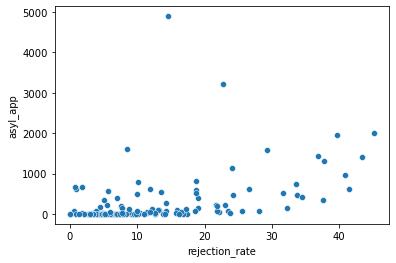

In [55]:
sns.scatterplot(x='rejection_rate', y='asyl_app', data=df2)
plt.show()

In [56]:
df2.corr()

,year,app,mev_issued,ltv,rejected,total_issued,rejection_rate,visa_free,asyl_app
year,1.000000,0.113931,0.089095,0.032176,0.143360,0.105218,0.121552,-0.018200,0.038185
app,0.113931,1.000000,0.961048,0.039064,0.406681,0.997006,-0.012252,-0.188783,0.055557
mev_issued,0.089095,0.961048,1.000000,0.009399,0.247663,0.969717,-0.087010,-0.134705,0.039183
ltv,0.032176,0.039064,0.009399,1.000000,0.112903,0.004196,0.125752,-0.077594,0.311343
rejected,0.143360,0.406681,0.247663,0.112903,1.000000,0.339451,0.522435,-0.308880,0.190791
total_issued,0.105218,0.997006,0.969717,0.004196,0.339451,1.000000,-0.055683,-0.168305,0.042406
rejection_rate,0.121552,-0.012252,-0.087010,0.125752,0.522435,-0.055683,1.000000,-0.402160,0.458092
visa_free,-0.018200,-0.188783,-0.134705,-0.077594,-0.308880,-0.168305,-0.402160,1.000000,-0.189462
asyl_app,0.038185,0.055557,0.039183,0.311343,0.190791,0.042406,0.458092,-0.189462,1.000000


In [51]:
df2.describe()

,year,app,mev_issued,ltv,rejected,total_issued,rejection_rate,visa_free,asyl_app
count,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.0,91.000000
mean,2016.253743,7807.990713,3490.572163,35.078973,777.985613,6928.740553,15.650944,0.0,292.725091
std,0.814008,17953.021245,11078.712634,58.222681,1369.474813,17417.549211,11.514630,0.0,490.110438
min,2012.450000,27.166667,7.833333,0.000000,0.000000,26.166667,0.000000,0.0,0.000000
25%,2016.361789,1388.356818,347.483333,2.575000,132.710323,1083.560784,6.562562,0.0,7.625000
50%,2016.500000,3270.900000,727.337500,13.250000,401.300000,2432.585366,12.706866,0.0,67.205882
75%,2016.558109,6461.280556,1992.708772,37.961345,971.345452,5411.002946,22.419494,0.0,413.458333
max,2017.250000,140939.965812,95084.461538,307.382022,11494.483660,138412.619658,45.162441,0.0,2182.400000


In [ ]:
Globally speaking rejection rate is not correlated with asylum requests.